# Luokiteltu jakauma cut-funktiolla 

In [1]:
#tuon tarvittavat kirjastot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#avaan Excel-datan dataframeen ja näytän viisi ensimmäistä riviä
df = pd.read_excel('http://taanila.fi/data1.xlsx')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [2]:
#tarkastelen aluksi ikäjakaumaa tunnuslukujen valossa
#huomaan, että nuorin on 20-vuotias ja vanhin 61-vuotias
df['ikä'].describe()

count    82.000000
mean     37.951220
std       9.773866
min      20.000000
25%      31.000000
50%      37.500000
75%      44.000000
max      61.000000
Name: ikä, dtype: float64

In [3]:
#asetan luokkarajat ja luokkien nimet
bins = [20, 30, 40, 50, 62]
group_names = ['20-29', '30-39', '40-49', '50-']

#luon aineistoon uudet muuttujat 'luokkarajat' ja 'ikäluokka'
#jos right=False, niin alarajat kuuluvat luokkaan, mutta ylärajat eivät
#jotta saan 61-vuotiaankin mukaan, niin suurin bin pitää olla vähintään 62
df['luokkarajat'] = pd.cut(df['ikä'], bins, right = False)
df['ikäluokka'] = pd.cut(df['ikä'], bins, labels = group_names, right = False)

#tarkistan luokkarajat: hakasulun vieressä oleva luku kuuluu luokkaan
#kaarisulun vieressä oleva luku ei kuulu luokkaan
pd.crosstab(df['luokkarajat'], 'lkm')

col_0,lkm
luokkarajat,
"[20, 30)",17
"[30, 40)",30
"[40, 50)",23
"[50, 62)",12


In [4]:
#lasken lukumäärä- ja prosenttiyhteenvedon 'ikäluokka'-muuttujalle
df1 = pd.crosstab(df['ikäluokka'], 'lkm')

#tarpeettoman otsikon poisto
df1.columns.name = ''

#lasken prosentit
df1['%'] = df1/df1.sum()*100

#muotoilen prosentit yhden desimaalin tarkkuuteen
df1.style.format({'%': '{:.1f} %'})

,lkm,%
ikäluokka,,
20-29,17,20.7 %
30-39,30,36.6 %
40-49,23,28.0 %
50-,12,14.6 %


Text(0, 0.5, 'Lukumäärä')

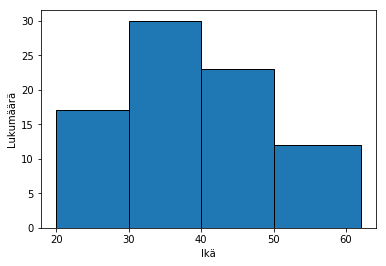

In [5]:
#histogrammin voin tehdä suoraan alkuperäisestä datasta
ax1 = df['ikä'].plot.hist(bins = bins, edgecolor = 'black')
ax1.set_xlabel('Ikä')
ax1.set_ylabel('Lukumäärä')

In [6]:
#tunnuslukuja ikäluokittain pivot_table()-funktiolla
df2 = df.pivot_table(values='palkka', index='ikäluokka', aggfunc=[len, min, max, np.mean])

#sarakkeiden nimeäminen
df2.columns = ['lkm', 'pienin', 'suurin', 'keskiarvo']

#loppusilaus
df2.style.format('{:.0f}')

,lkm,pienin,suurin,keskiarvo
ikäluokka,,,,
20-29,17,1521,5225,2422
30-39,30,1559,5069,2455
40-49,23,1715,4874,2624
50-,12,1872,6278,2921


In [7]:
#katson vielä, miltä 'luokkarajat' ja 'ikäluokka' näyttävät datassa
df[['luokkarajat','ikäluokka']]

,luokkarajat,ikäluokka
0,"[30, 40)",30-39
1,"[20, 30)",20-29
2,"[30, 40)",30-39
3,"[30, 40)",30-39
4,"[20, 30)",20-29
5,"[30, 40)",30-39
6,"[40, 50)",40-49
7,"[50, 62)",50-
8,"[40, 50)",40-49
9,"[30, 40)",30-39
